In [48]:
import pandas as pd
import numpy as np
import ast


In [49]:
kld_df = pd.read_csv('KLDscores.csv')

# Load book metadata
metadata_df = pd.read_csv('SPGC-metadata-2018-07-18.csv')

In [50]:
#preprocessing

kld_df['kld_values']=kld_df['kld_values'].apply(ast.literal_eval)

In [51]:
#Basic analysis
from scipy.stats import skew,kurtosis

kld_df['avg_kld'] = kld_df['kld_values'].apply(np.mean)
kld_df['variance_kld'] = kld_df['kld_values'].apply(np.var)
kld_df['slope_kld'] = kld_df['kld_values'].apply(lambda row: np.polyfit(np.arange(len(row)), row, 1)[0])
kld_df['range_kld'] = kld_df['kld_values'].apply(np.max) - kld_df['kld_values'].apply(np.min)
kld_df['median_kld'] = kld_df['kld_values'].apply(np.median)
kld_df['skew_kld'] = kld_df['kld_values'].apply(skew)
kld_df['kurtosis_kld']=kld_df['kld_values'].apply(kurtosis)
kld_df['sum_kld'] = kld_df['kld_values'].apply(np.sum)
kld_df['stdDev_kld'] = kld_df['kld_values'].apply(np.std)




,filename,kld_values,avg_kld,variance_kld,slope_kld,max_kld,min_kld,range_kld,median_kld,skew_kld
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2...",0.234033,0.001644,0.000870,0.450747,0.192720,0.258026,0.223884,3.214062
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2...",0.243351,0.001105,0.000143,0.390158,0.206327,0.183832,0.239227,1.876079
2,PG10003,"[0.2502283960399736, 0.2304129699198611, 0.238...",0.241611,0.003573,0.001259,0.541167,0.200838,0.340330,0.229338,4.132600
3,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220...",0.240153,0.002246,0.000813,0.548940,0.204162,0.344778,0.233289,5.612184
4,PG10012,"[0.25125974534678364, 0.23622148585532693, 0.2...",0.226469,0.000255,0.000054,0.276054,0.189317,0.086737,0.226679,0.209351
...,...,...,...,...,...,...,...,...,...,...
23188,PG9971,"[0.22838257901564088, 0.21120893011566938, 0.2...",0.251995,0.001736,0.000261,0.446346,0.197951,0.248395,0.245126,2.346952
23189,PG9993,"[0.2471592500558816, 0.1970731579466416, 0.291...",0.234510,0.000634,0.000134,0.338172,0.192124,0.146047,0.229159,1.585406
23190,PG9983,"[0.21198661056119145, 0.21617505920334878, 0.2...",0.228159,0.000825,0.000612,0.406871,0.196882,0.209988,0.225431,4.844731
23191,PG996,"[0.24116003079407344, 0.21510152162479515, 0.2...",0.208989,0.000190,-0.000162,0.252348,0.189248,0.063100,0.205803,1.051833


In [52]:
book_score_merged = pd.merge(kld_df, metadata_df, left_on='filename',right_on='id')
book_score_merged


,filename,kld_values,avg_kld,variance_kld,slope_kld,max_kld,min_kld,range_kld,median_kld,skew_kld,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2...",0.234033,0.001644,0.000870,0.450747,0.192720,0.258026,0.223884,3.214062,PG10002,The House on the Borderland,"Hodgson, William Hope",1877.0,1918.0,['en'],593.0,{'Science fiction'},Text
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2...",0.243351,0.001105,0.000143,0.390158,0.206327,0.183832,0.239227,1.876079,PG10005,A Voyage to the Moon: With Some Account of the...,"Tucker, George",1775.0,1861.0,['en'],17.0,"{'Space flight to the moon -- Fiction', 'Scien...",Text
2,PG10003,"[0.2502283960399736, 0.2304129699198611, 0.238...",0.241611,0.003573,0.001259,0.541167,0.200838,0.340330,0.229338,4.132600,PG10003,"My First Years as a Frenchwoman, 1876-1879","Waddington, Mary King",1833.0,1923.0,['en'],11.0,"{'France -- History -- Third Republic, 1870-19...",Text
3,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220...",0.240153,0.002246,0.000813,0.548940,0.204162,0.344778,0.233289,5.612184,PG10008,The Mystery,"White, Stewart Edward",1873.0,1946.0,['en'],47.0,{'Science fiction'},Text
4,PG10012,"[0.25125974534678364, 0.23622148585532693, 0.2...",0.226469,0.000255,0.000054,0.276054,0.189317,0.086737,0.226679,0.209351,PG10012,The Mountains of California,"Muir, John",1838.0,1914.0,['en'],93.0,"{'Natural history -- California', 'Mountain ec...",Text
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18983,PG9971,"[0.22838257901564088, 0.21120893011566938, 0.2...",0.251995,0.001736,0.000261,0.446346,0.197951,0.248395,0.245126,2.346952,PG9971,"The Dramatic Works of Gerhart Hauptmann, Volume I","Hauptmann, Gerhart",1862.0,1946.0,['en'],25.0,{'German drama -- Translations into English'},Text
18984,PG9993,"[0.2471592500558816, 0.1970731579466416, 0.291...",0.234510,0.000634,0.000134,0.338172,0.192124,0.146047,0.229159,1.585406,PG9993,Captivating Mary Carstairs,"Harrison, Henry Sydnor",1880.0,1930.0,['en'],8.0,{'Fiction'},Text
18985,PG9983,"[0.21198661056119145, 0.21617505920334878, 0.2...",0.228159,0.000825,0.000612,0.406871,0.196882,0.209988,0.225431,4.844731,PG9983,Wylder's Hand,"Le Fanu, Joseph Sheridan",1814.0,1873.0,['en'],28.0,"{'Inheritance and succession -- Fiction', 'Mis...",Text
18986,PG996,"[0.24116003079407344, 0.21510152162479515, 0.2...",0.208989,0.000190,-0.000162,0.252348,0.189248,0.063100,0.205803,1.051833,PG996,Don Quixote,"Cervantes Saavedra, Miguel de",1547.0,1616.0,['en'],4257.0,{'Spain -- Social life and customs -- 16th cen...,Text


In [55]:
from sklearn.linear_model import LinearRegression, LassoCV
x = book_score_merged[['avg_kld', 'variance_kld', 'slope_kld']]
y = book_score_merged['downloads']
reg = LinearRegression().fit(x, y)
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficients: [  -502.4135662    2930.2647566  -29727.02847817]
Intercept: 199.25222503991245


In [56]:

# Prepare data for regression
book_score_merged['log_downloads'] = np.log1p(book_score_merged['downloads'])
X = book_score_merged[['avg_kld', 'variance_kld', 'slope_kld', 'max_kld', 'min_kld', 'range_kld', 'median_kld','skew_kld']]
y = book_score_merged['log_downloads']

# Linear Regression
reg = LinearRegression().fit(X, y)
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

# LASSO Regression for feature selection
lasso = LassoCV(cv=5).fit(X, y)
print('LASSO Coefficients:', lasso.coef_)
print('LASSO Intercept:', lasso.intercept_)


Coefficients: [-2.90927154e+00  4.43453456e+01 -7.42687381e+01  1.13752660e+00
  2.73982256e+00 -1.60229596e+00  7.75256459e-01 -3.26110220e-02]
Intercept: 3.117138318786647
LASSO Coefficients: [ 0.          0.         -0.          0.          0.          0.
  0.         -0.05005729]
LASSO Intercept: 3.3418319880174


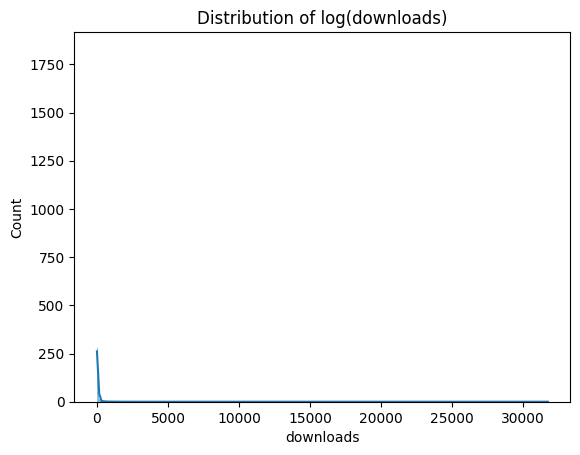

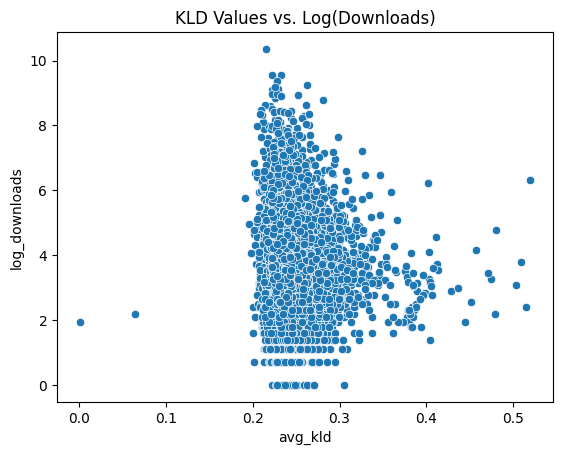

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of log(downloads)
sns.histplot(book_score_merged['downloads'], kde=True)
plt.title('Distribution of log(downloads)')
plt.show()

# Plot relationships between kld_values and log_downloads
sns.scatterplot(x='avg_kld', y='log_downloads', data=book_score_merged)
plt.title('KLD Values vs. Log(Downloads)')
plt.show()



In [58]:
extra=pd.read_csv("extra_controls.csv")

In [60]:
book_merged= pd.merge(book_score_merged , extra, left_on='filename',right_on='id')
book_merged


,filename,kld_values,avg_kld,variance_kld,slope_kld,max_kld,min_kld,range_kld,median_kld,skew_kld,...,subj2_horror,subj2_mystery,subj2_crime,subj2_history,subj2_periodicals,subj2_others,speed,sentiment_avg,sentiment_vol,wordcount
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2...",0.234033,0.001644,0.000870,0.450747,0.192720,0.258026,0.223884,3.214062,...,0,0,0,0,0,0,0.224141,0.08737,0.002701,50831.0
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2...",0.243351,0.001105,0.000143,0.390158,0.206327,0.183832,0.239227,1.876079,...,0,0,0,0,0,0,0.221966,0.13182,0.003394,70142.0
2,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220...",0.240153,0.002246,0.000813,0.548940,0.204162,0.344778,0.233289,5.612184,...,0,0,0,0,0,0,0.204838,0.10778,0.003655,65421.0
3,PG10024,"[0.284910811514924, 0.24774669455226234, 0.267...",0.254255,0.001386,0.000174,0.391514,0.184814,0.206700,0.247747,1.263222,...,0,0,0,0,0,0,0.243380,0.14034,0.002940,49162.0
4,PG10057,"[0.22988547820277444, 0.24055226987795503, 0.2...",0.247845,0.001715,0.000090,0.481949,0.203087,0.278862,0.240552,3.735866,...,0,1,0,0,0,0,0.221491,0.14015,0.003855,50680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8544,PG9986,"[0.23145821926283078, 0.21821643194247953, 0.2...",0.238457,0.000984,0.000811,0.336083,0.185911,0.150171,0.233220,1.052309,...,0,0,0,0,0,1,0.180942,0.14979,0.006868,85950.0
8545,PG9981,"[0.22398044121450278, 0.2177760219339848, 0.22...",0.235281,0.001369,0.000817,0.459716,0.203732,0.255983,0.227832,4.615874,...,0,0,0,0,0,1,0.184776,0.14477,0.006882,116648.0
8546,PG9993,"[0.2471592500558816, 0.1970731579466416, 0.291...",0.234510,0.000634,0.000134,0.338172,0.192124,0.146047,0.229159,1.585406,...,0,0,0,0,0,1,0.179779,0.13360,0.005026,84156.0
8547,PG9983,"[0.21198661056119145, 0.21617505920334878, 0.2...",0.228159,0.000825,0.000612,0.406871,0.196882,0.209988,0.225431,4.844731,...,0,1,0,0,0,0,0.152456,0.15343,0.009224,167578.0


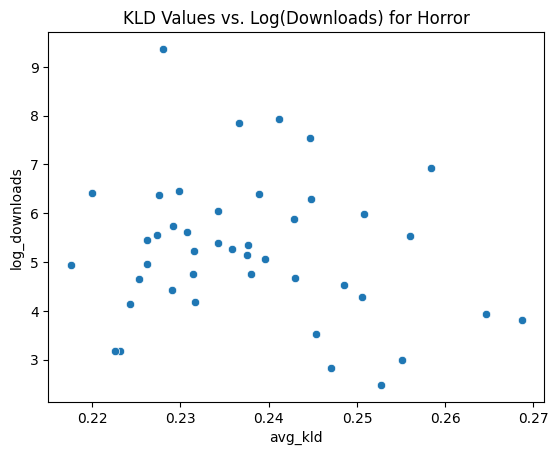

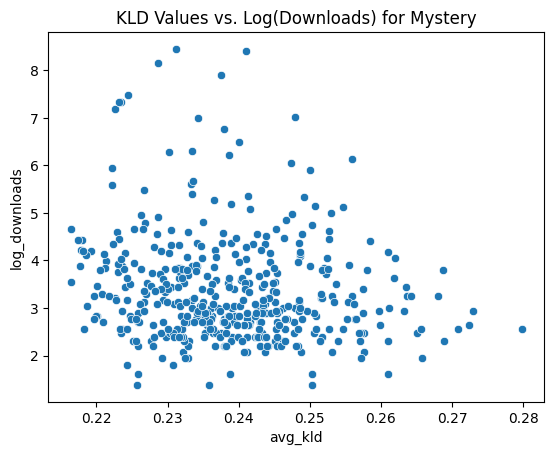

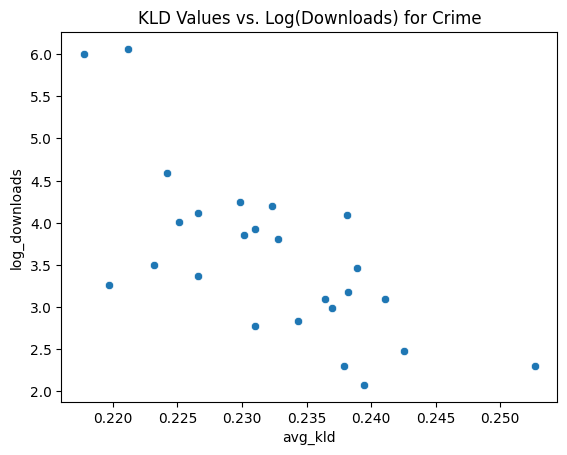

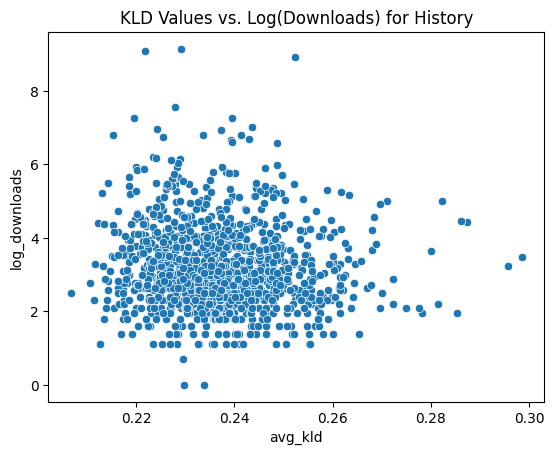

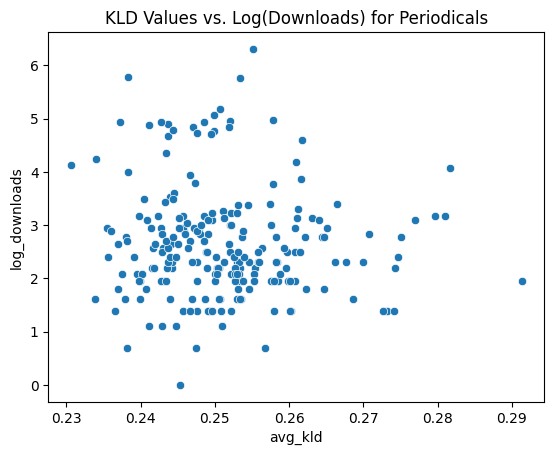

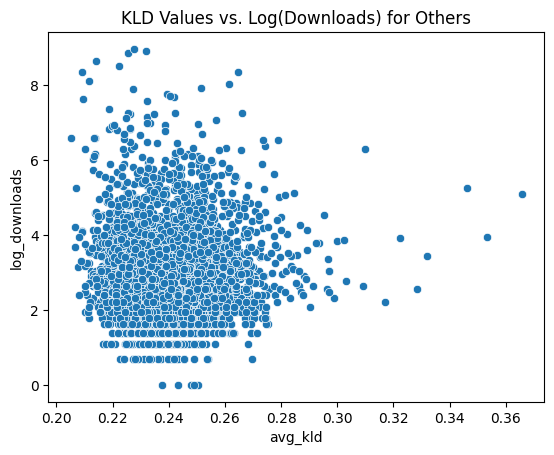

In [66]:
genres = ['horror', 'mystery', 'crime', 'history', 'periodicals', 'others']

for genre in genres:
    genre_data = book_merged[book_merged[f'subj2_{genre}'] == 1]
    sns.scatterplot(x='avg_kld', y='log_downloads', data=genre_data)
    plt.title(f'KLD Values vs. Log(Downloads) for {genre.capitalize()}')
    plt.show()